# ДЗ4 Оцениваемое

# Задание 1

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [1]:
#2.1
with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8') as f:
    text = f.read()

from nltk.tokenize import word_tokenize

tokenized = word_tokenize(text)

from nltk.stem.snowball import SnowballStemmer

snowball = SnowballStemmer("english")

from string import punctuation

filtered = [snowball.stem(w.lower()) for w in word_tokenize(text) if (w not in punctuation+"«»" and w != '...')]

with open('Harry_Potter_and_the_Sorcerers_Stone_lemmas.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(filtered))

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

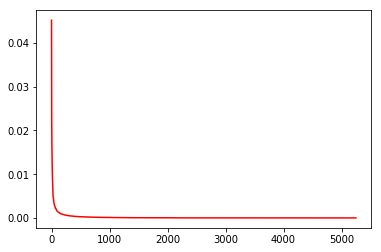

In [4]:
#2.2

import matplotlib.pyplot as plt
%matplotlib inline

lemmas = filtered

counts = dict()
for lemma in lemmas:
    if lemma in counts:
        counts[lemma] += 1
    else:
        counts[lemma] = 1

for lemma in counts:
    counts[lemma] /= len(lemmas) # деление на количество слов в тексте

sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

words = [w[0] for w in sorted_counts]
counts = [w[1] for w in sorted_counts]

plt.plot(range(len(words)), counts, c='r')
plt.show()

Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

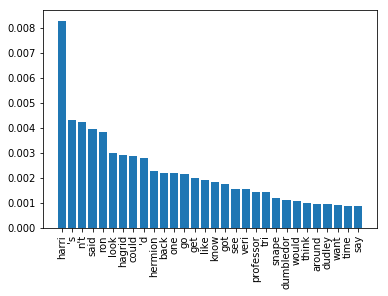

In [3]:
#3
from nltk.corpus import stopwords

sw = stopwords.words('english')

filtered_words = []
filtered_counts = []
for i, lemma in enumerate(words):
    if lemma not in sw:
        filtered_words.append(lemma)
        filtered_counts.append(counts[i] * 1000000)

plt.bar(range(30), counts[:30])
plt.xticks(range(30), filtered_words[:30], rotation=90)
plt.show()